# Individual Project - Mikautadze Sandro

## Description

This dataset is composed of 1300 samples with 35 features each. The first column is the sample id. The second column in the dataset represents the label. There are 3 possible values for the labels. The remaining columns are numeric features.

Notice that the classes are unbalanced: some labels are more frequent than others. You need to decide whether to take this into account, and if so how.

Your task is the following: you should compare the performance of Logistic Regression (implemented by sklearn.linear_model.LogisticRegression) with that of
a Random Forest (implemented by sklearn.ensemble.RandomForestClassifier). Try to optimize both algorithms' parameters and determine which one is best for this dataset. At the end of the analysis, you should have chosen an algorithm and its optimal set of parameters: write this choice explicitly in the conclusions of your notebook.

Your notebook should detail the procedure you have used to choose the optimal parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on the procedure employed, which should balance practical considerations (one may not be able to exhaustively explore all possible combinations of the parameters) with the desire for achieving the best possible performance in the least amount of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-presented results.

You are also free to attempt other strategies beyond the one in the assignment (which however is mandatory!).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

# EDA

In [7]:
path = "./mldata_0003161492.csv"
df = pd.read_csv(path)

In [3]:
df

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,0,-2.338997,-0.921833,-6.421755,1.103010,0.818224,-1.724055,4.137555,-0.908668,...,2.350584,6.715730,1.278377,1.358476,-2.060725,3.395010,0.387875,-0.643291,-3.685433,-0.406952
1,1,0,2.676776,-0.281999,5.349257,-2.233029,3.755392,-2.079637,-4.532365,-0.749668,...,-1.193472,4.345153,-0.051959,-1.111292,0.264024,-2.109751,2.053052,0.480851,0.463848,-1.072773
2,2,1,0.947973,1.357810,5.242225,6.588693,3.828940,-1.537064,2.032656,1.025569,...,1.794695,1.712249,-1.094418,1.283094,-0.135157,1.217554,9.706778,1.085883,-2.071278,-2.636375
3,3,2,1.489656,5.428263,2.349441,1.913193,6.978886,-4.362240,0.158783,0.874011,...,0.511445,-1.900537,-0.364702,0.151779,2.161815,-2.143253,-3.040725,1.145734,-2.432364,1.533760
4,4,0,1.692123,0.760563,1.177094,1.578033,-0.608175,-2.494188,4.245693,-0.453243,...,-1.112025,3.028310,1.343619,0.415805,0.597631,-7.315297,0.275782,0.504953,-0.580877,1.079335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1295,1,-1.473945,1.842527,0.590227,-0.003053,1.902050,2.976965,-2.269490,0.288363,...,2.902052,2.762766,0.599928,0.732135,-0.804870,-1.506726,0.329001,0.564331,-2.289251,-0.765629
1296,1296,1,3.924118,2.335212,4.730293,2.448407,0.065894,1.560059,-1.230568,-0.769147,...,2.116391,4.584136,-1.431593,2.265147,2.036968,-2.535083,-0.269355,0.613394,-2.978079,-1.182410
1297,1297,1,-1.084748,-1.668106,-2.803314,-2.010034,0.384042,3.657118,-4.209331,0.740074,...,-0.306595,-3.782152,0.604195,-1.644448,-4.018991,-7.378994,2.211648,-0.438963,-0.044838,-0.646174
1298,1298,1,1.009681,-2.670429,-0.873377,-4.334112,-0.354370,1.368990,2.581640,0.644435,...,0.502755,-3.532700,-0.112138,2.180659,-0.689396,-2.055466,-3.429669,0.518096,2.117336,0.811074


As written in the description, there are 1300 samples and 35 features. There's an additional column representing the labels and one for the indices. Let's check the first column to see whether we can remove it, as it seems redundant with the index of the data frame.

In [4]:
len(df["Unnamed: 0"].unique()), df["Unnamed: 0"].isna().sum()

(1300, 0)

Since there are indeed 1300 unique elements and no missing values we can remove that column without any problem.

In [8]:
df = df.drop(columns="Unnamed: 0")
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,-2.338997,-0.921833,-6.421755,1.103010,0.818224,-1.724055,4.137555,-0.908668,0.174246,...,2.350584,6.715730,1.278377,1.358476,-2.060725,3.395010,0.387875,-0.643291,-3.685433,-0.406952
1,0,2.676776,-0.281999,5.349257,-2.233029,3.755392,-2.079637,-4.532365,-0.749668,-1.348492,...,-1.193472,4.345153,-0.051959,-1.111292,0.264024,-2.109751,2.053052,0.480851,0.463848,-1.072773
2,1,0.947973,1.357810,5.242225,6.588693,3.828940,-1.537064,2.032656,1.025569,1.012478,...,1.794695,1.712249,-1.094418,1.283094,-0.135157,1.217554,9.706778,1.085883,-2.071278,-2.636375
3,2,1.489656,5.428263,2.349441,1.913193,6.978886,-4.362240,0.158783,0.874011,0.629991,...,0.511445,-1.900537,-0.364702,0.151779,2.161815,-2.143253,-3.040725,1.145734,-2.432364,1.533760
4,0,1.692123,0.760563,1.177094,1.578033,-0.608175,-2.494188,4.245693,-0.453243,-0.843662,...,-1.112025,3.028310,1.343619,0.415805,0.597631,-7.315297,0.275782,0.504953,-0.580877,1.079335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1,-1.473945,1.842527,0.590227,-0.003053,1.902050,2.976965,-2.269490,0.288363,1.275157,...,2.902052,2.762766,0.599928,0.732135,-0.804870,-1.506726,0.329001,0.564331,-2.289251,-0.765629
1296,1,3.924118,2.335212,4.730293,2.448407,0.065894,1.560059,-1.230568,-0.769147,-1.481217,...,2.116391,4.584136,-1.431593,2.265147,2.036968,-2.535083,-0.269355,0.613394,-2.978079,-1.182410
1297,1,-1.084748,-1.668106,-2.803314,-2.010034,0.384042,3.657118,-4.209331,0.740074,-0.644457,...,-0.306595,-3.782152,0.604195,-1.644448,-4.018991,-7.378994,2.211648,-0.438963,-0.044838,-0.646174
1298,1,1.009681,-2.670429,-0.873377,-4.334112,-0.354370,1.368990,2.581640,0.644435,0.838265,...,0.502755,-3.532700,-0.112138,2.180659,-0.689396,-2.055466,-3.429669,0.518096,2.117336,0.811074


Let's check the data types.

In [6]:
df.dtypes.value_counts()

float64    35
int64       1
dtype: int64

All values are numbers: the label column is in ```int64 ```, while all features are ```float64```. Let's check if there are any missing values:

In [7]:
df.isna().sum().sum()

0

There are no missing values. Let's check the labels.

In [8]:
df["label"].unique()

array([0, 1, 2], dtype=int64)

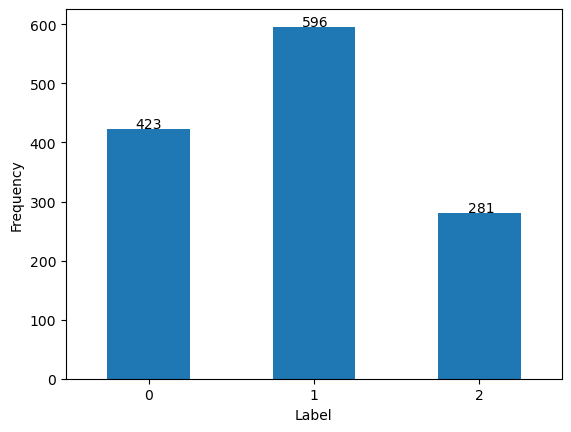

In [9]:
cat0 = df["label"].value_counts()[0]
cat1 = df["label"].value_counts()[1]
cat2 = df["label"].value_counts()[2]
s = pd.Series({"0" : cat0, "1" : cat1, "2": cat2})
s.plot.bar(rot = 0)
plt.text(-0.08, 424, str(cat0))
plt.text(0.93, 597, str(cat1))
plt.text(1.93, 282, str(cat2))
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

In [10]:
df["label"].value_counts(normalize=True)

1    0.458462
0    0.325385
2    0.216154
Name: label, dtype: float64

As written in the description, the classes are clearly unbalanced. Since we're in the EDA stage, now we're just interested in understanding the data. Thus, I will deal with this property later on.

Let's now check the features. First of all, let's see some summary statistics.

In [9]:
df_features = df.loc[:, "feature_1":"feature_35"]
# df_features
df_features.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,-0.011638,0.475509,0.475390,0.451898,0.786413,-0.052419,0.243365,0.116271,0.104490,0.412090,...,-0.263426,0.751659,0.060817,0.065442,0.158189,0.319648,0.115970,0.097729,-0.433838,0.075434
std,3.078006,2.965121,3.032967,2.979545,3.098926,2.943867,3.065533,0.996974,1.046157,2.834112,...,2.975052,2.931247,1.023602,0.988677,2.866266,3.043220,3.026234,0.984642,2.814275,0.979925
min,-11.597528,-9.175228,-8.669184,-7.720225,-10.306490,-8.813567,-9.044988,-3.539026,-3.182069,-8.513150,...,-9.125584,-7.497496,-3.032916,-3.025494,-8.939708,-9.488369,-9.736704,-2.735998,-10.796589,-3.103213
25%,-2.094788,-1.549281,-1.603479,-1.590986,-1.315061,-2.108276,-1.817793,-0.592756,-0.588159,-1.425282,...,-2.094500,-1.169682,-0.642700,-0.618065,-1.828149,-1.573960,-1.994226,-0.606635,-2.352918,-0.582999
50%,0.082867,0.477947,0.329863,0.477208,0.908888,-0.031397,0.141730,0.110436,0.091669,0.254218,...,-0.334253,0.872506,0.051565,0.070750,-0.000744,0.353504,0.137425,0.103151,-0.535374,0.087191
75%,1.995706,2.526554,2.467192,2.469684,2.811657,1.797619,2.306939,0.808401,0.830353,2.182110,...,1.681725,2.717620,0.784023,0.746915,2.103154,2.272145,2.060864,0.783367,1.578837,0.751618
max,10.148086,10.166224,9.905998,10.914493,13.483779,9.681095,10.755311,3.225945,4.336729,10.771436,...,9.410880,11.600749,3.171965,3.218397,10.869700,9.494343,11.016773,3.088124,8.044478,3.246657


First of all, the mean of all values seems low and approximately close to 0. The standard deviation seems low too. As far as the range of the values, at first sight, they seem scaled in a symmetric range $[-x, x]$ where $x$ seems not unique, as various features have different ranges.
Let's check the distributions.

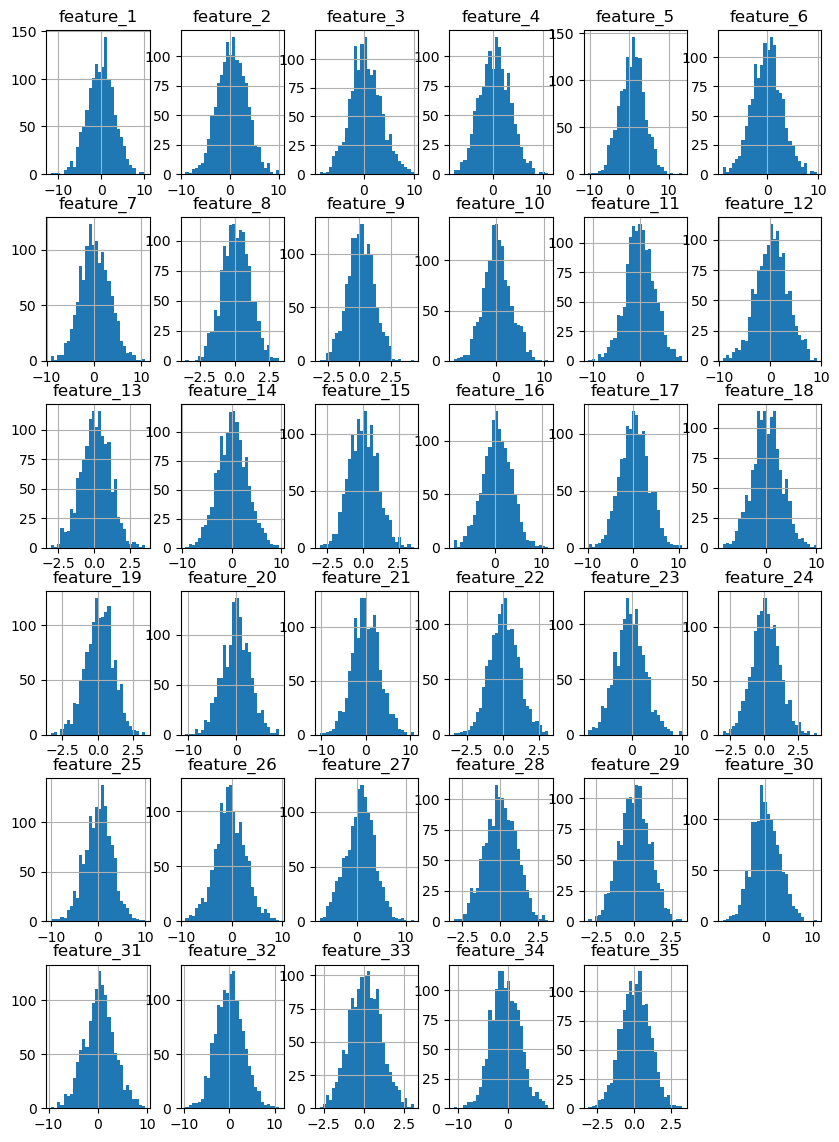

In [12]:
df_features.hist(figsize=(10, 14), bins = 30)
plt.show()

By inspecting the plots and putting all the previous information together, we can see that the data has been normalized and is normally distributed. Of course, a visual inspection is not enough and to be precise one should prove it statistically, but for the purpose of the project, this observation is enough.

Let's now look at the correlation.

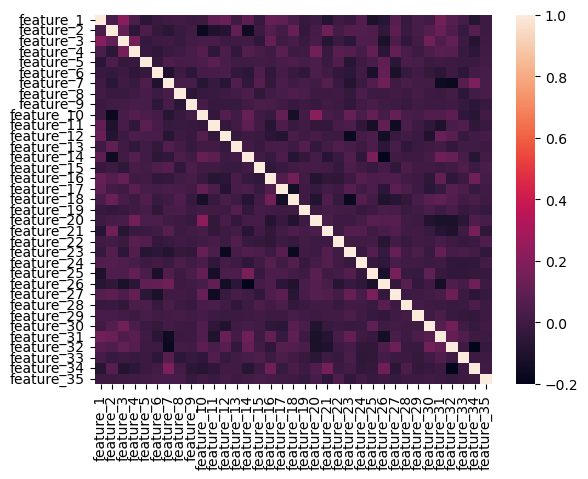

In [13]:
corr = df_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Apparently, most features are uncorrelated or little correlated. Of course, it's crucial to notice that the relationship that the correlation coefficient captures is linear. Thus we can say that there is no linear correlation between the features. In addition, since the correlation is almost always 0, we can possibly interpret the features independently (notice however that 0 correlation doesn't imply independence, so mine it's just a guess that would need to be checked statistically).

Let's now check the outliers, using boxplots.

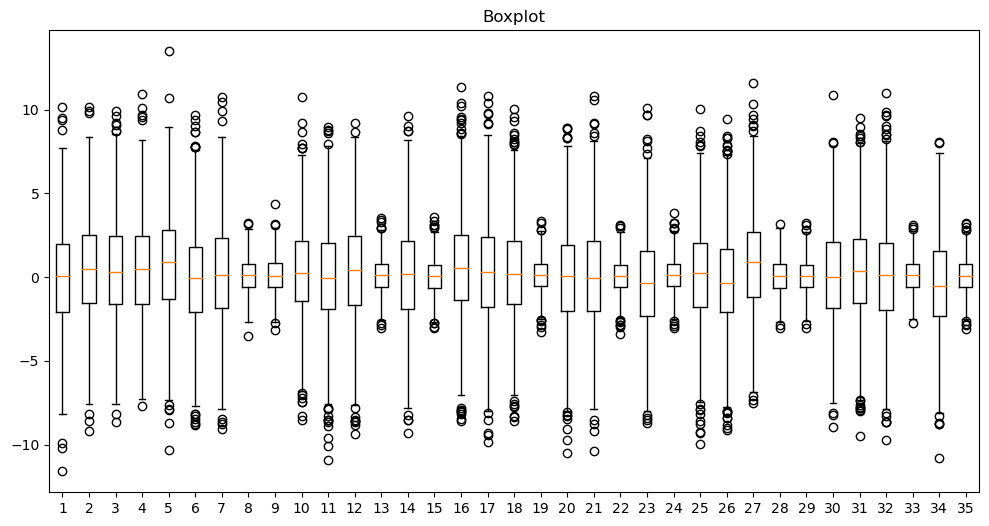

In [14]:
fig, axs = plt.subplots(1, figsize=(12,6))
plt.boxplot(df_features)
plt.title("Boxplot")
plt.show()

Apart from further confirming the symmetry coming from the normality of the data, the boxplots provide us with information about the outliers. Let's check how many they are in each feature, using the IQR in order to find exactly the ones in the boxplot.

In [15]:
column_outliers = {} # key:value is column:number of outliers
for col in df_features.columns:
    s = df_features[col]
    lower_quantile = s.quantile(0.25)
    upper_quantile = s.quantile(0.75)
    IQR = upper_quantile - lower_quantile
    boolean_out = (s < s.quantile(0.25) - 1.5 * IQR) | (s > s.quantile(0.75) + 1.5 * IQR)
    column_outliers[col] = boolean_out.value_counts().loc[True]
pd.Series(column_outliers)

feature_1      7
feature_2      6
feature_3      8
feature_4      6
feature_5      7
feature_6     16
feature_7      8
feature_8      3
feature_9      5
feature_10    14
feature_11    17
feature_12    10
feature_13     9
feature_14     8
feature_15    10
feature_16    19
feature_17    11
feature_18    17
feature_19    10
feature_20    13
feature_21    10
feature_22    10
feature_23    11
feature_24    11
feature_25    15
feature_26    20
feature_27    10
feature_28     3
feature_29     6
feature_30     6
feature_31    16
feature_32    15
feature_33     4
feature_34     7
feature_35     9
dtype: int64

As we can see each column has few outliers, with respect to the entire number of samples, and they're still very close to the quantiles. Moreover, since the data doesn't represent anything specific, but it's just synthetic and randomly generated, I decide to keep them. Of course, I'm not claiming that this is the correct approach, but given the scope and the purpose of the project, this seems reasonable.

# Data Visualization

Let's now visualize the data to understand it even more. I will use two methods: PCA and t-SNE.

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

def plot_dim_red(dim_type, data, ax1, ax2, ax3):
    """
    Auxiliary function that plots the 2D and 3D plots of the dimensionality reductions

    Args:
        dim_type (str): dimensionality type
        data (dataframe): data for the dimensionality reduction
        ax1 (str): first axis label
        ax2 (str): second axis label
        ax3 (str): third axis label
    """
    
    labels = df["label"]
    fig = plt.figure(figsize=(10, 5))
    ax_2d = fig.add_subplot(121)
    ax_3d = fig.add_subplot(122, projection='3d')
    plt.suptitle(f"{dim_type} Visualization")
    
    # 2D
    scatter_2d = ax_2d.scatter(data[:, 0], data[:, 1], c=labels)
    ax_2d.set_xlabel(ax1)
    ax_2d.set_ylabel(ax2)
    
    if dim_type == "PCA":
        ax_2d.set_title(f"Explained Variance: {round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], 2)}")
    
    # 3D Plot (fix label of third dimension not in picture)
    scatter_3d = ax_3d.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)
    ax_3d.set_xlabel(ax1)
    ax_3d.set_ylabel(ax2)
    ax_3d.set_zlabel(ax3)
    
    if dim_type == "PCA":
        ax_3d.set_title(f"Explained Variance: {round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[3], 2)}")
    
    # add legend
    handles_3d, labels_3d = scatter_2d.legend_elements()
    ax_3d.legend(handles_3d, labels_3d, loc='best', title='Classes')
    
    plt.tight_layout()

## PCA

Let's start with PCA, which transforms high-dimensional data into a lower-dimensional representation while preserving the most important information by identifying the directions of maximum variance in the data. 

In [17]:
df_scaled = StandardScaler().fit_transform(df_features)
pca = PCA()

In [18]:
df_pca = pca.fit_transform(df_scaled)

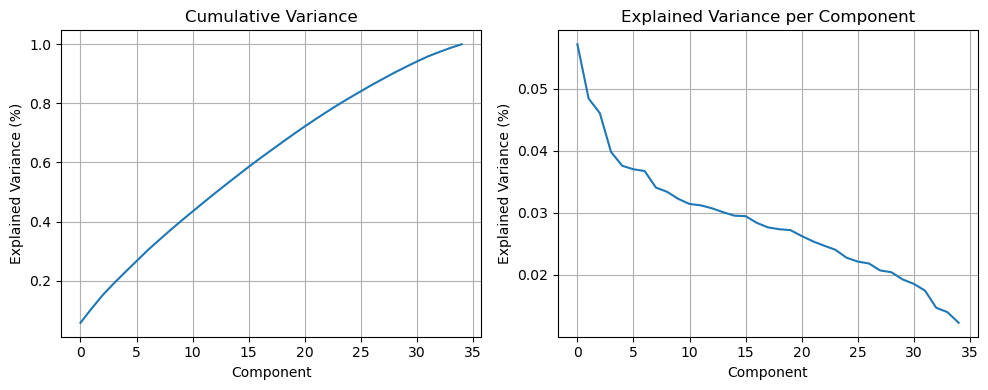

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 4))
# plot 1
plt.subplot(1, 2, 1)
plt.title("Cumulative Variance")
plt.plot(cumsum)
plt.xlabel("Component")
plt.ylabel("Explained Variance (%)")
plt.grid(True)
# plot 2
plt.subplot(1, 2, 2)
plt.title("Explained Variance per Component")
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Explained Variance (%)")
plt.xlabel('Component')
plt.grid(True)
plt.tight_layout()
plt.show()

We see that most variance is explained linearly with respect to the components. Moreover, in the right plot, we don't see a true elbow, thus no ideal number of components could be selected. Let's now plot it in 2 and 3 dimensions, to see if any interesting structure emerges.

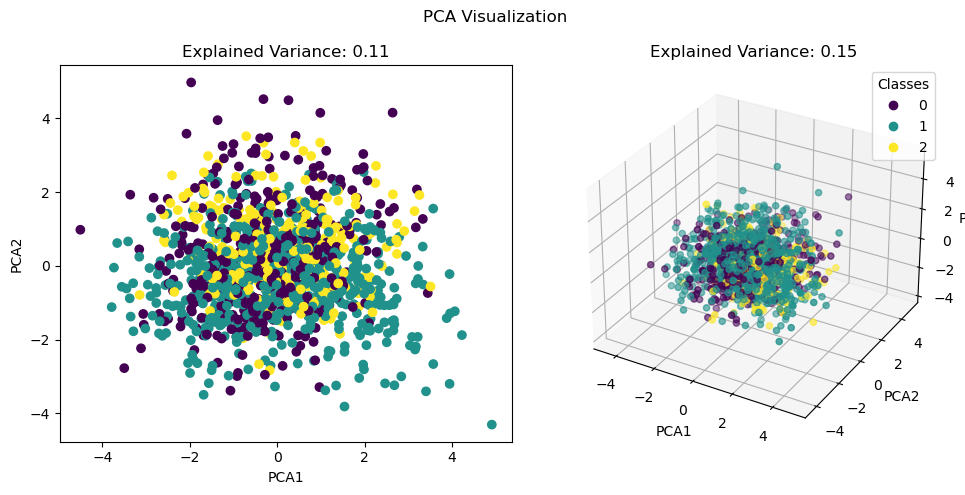

In [20]:
plot_dim_red("PCA", df_pca, "PCA1", "PCA2", "PCA3")

Clearly, there is no distinction between the classes, as they're all mixed with each other.

## t-SNE

This technique is non-linear and it preserves the local relationships between data points in a lower-dimensional space by minimizing the KL divergence between the high dimensional and low dimensional distribution. So t-SNE might be useful at visualizing the data as it preserves local distances.

In [21]:
tsne = TSNE(n_components=3, perplexity=20, random_state=42)
df_tsne = tsne.fit_transform(df_features)

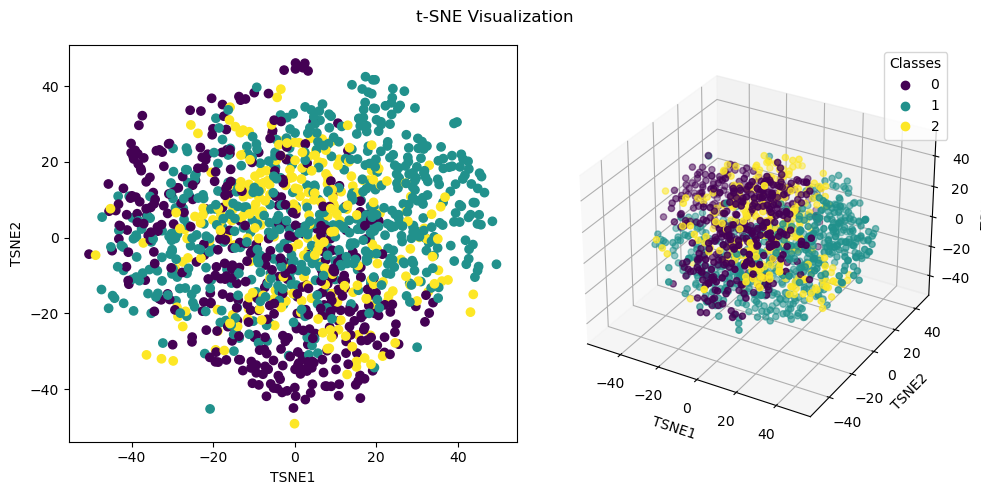

In [22]:
plot_dim_red("t-SNE", df_tsne, "TSNE1", "TSNE2", "TSNE3")

In this case, the effect of the distance-preserving measure seems to appear, as the points of each class are closer, especially in the 3D plot. However, we can still conclude that no clear separation emerges.

# Hypotheses on Model's Performances

Just like any good scientist, it is fundamental to have some hypotheses before actually performing the experiments! 

In our case, the EDA has given us important pieces of information on what might possibly come out from the models. As a matter of fact, we clearly see that the data is not separable in low dimensions as it is very overlapped. What this means is that very likely both logistic regression and random forest will have low accuracy and high errors. In fact, logistic regression is used for linear classification problems, so a linear decision boundary will possibly fail to properly capture the nonlinear patterns in the dataset. As for random forest, even though it can capture nonlinear dynamics, the decision boundaries might be more intricate and possibly lead to overfitting very easily and thus a high test error. Yet, being an ensemble method it might be more robust to imbalances since they will be dealt with internally by the trees.

# Learning

Now that we have analyzed the data and recognized that there's no need to preprocess it in any particular fashion, we can jump into the learning part. At this stage, it becomes fundamental to consider the class unbalances. This might be a problem, not because the classes are unbalanced _per se_, but because there may not be sufficient patterns representing the under-represented classes. In practice, there's no correct approach to handle this, so I will do it this way:
- _Unbalanced_ Learning: I will train the models on the data as is, keeping the unbalance
- _Balanced_ Learning: I will train the models on more balanced data by over/undersampling

By doing so, it will be possible to identify whether the unbalance actually has a role in the predictions, or whether it is just a factor to not consider, and finally choose the best model.

In [10]:
labels = df["label"]
labels

0       0
1       0
2       1
3       2
4       0
       ..
1295    1
1296    1
1297    1
1298    1
1299    2
Name: label, Length: 1300, dtype: int64

In [24]:
df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,-2.338997,-0.921833,-6.421755,1.103010,0.818224,-1.724055,4.137555,-0.908668,0.174246,...,2.350584,6.715730,1.278377,1.358476,-2.060725,3.395010,0.387875,-0.643291,-3.685433,-0.406952
1,0,2.676776,-0.281999,5.349257,-2.233029,3.755392,-2.079637,-4.532365,-0.749668,-1.348492,...,-1.193472,4.345153,-0.051959,-1.111292,0.264024,-2.109751,2.053052,0.480851,0.463848,-1.072773
2,1,0.947973,1.357810,5.242225,6.588693,3.828940,-1.537064,2.032656,1.025569,1.012478,...,1.794695,1.712249,-1.094418,1.283094,-0.135157,1.217554,9.706778,1.085883,-2.071278,-2.636375
3,2,1.489656,5.428263,2.349441,1.913193,6.978886,-4.362240,0.158783,0.874011,0.629991,...,0.511445,-1.900537,-0.364702,0.151779,2.161815,-2.143253,-3.040725,1.145734,-2.432364,1.533760
4,0,1.692123,0.760563,1.177094,1.578033,-0.608175,-2.494188,4.245693,-0.453243,-0.843662,...,-1.112025,3.028310,1.343619,0.415805,0.597631,-7.315297,0.275782,0.504953,-0.580877,1.079335


# Unbalanced Learning

I will perform a stratified sampling procedure. This will ensure that the proportions in the train and test set will roughly match those in the original dataset. 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, labels, test_size=0.2, stratify=df["label"], random_state=42)

Let's check that the proportions are the same both with respect to each other and with respect to the original dataset.

In [26]:
y_train.value_counts(normalize=True)

1    0.458654
0    0.325000
2    0.216346
Name: label, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

1    0.457692
0    0.326923
2    0.215385
Name: label, dtype: float64

In [28]:
df["label"].value_counts(normalize=True)

1    0.458462
0    0.325385
2    0.216154
Name: label, dtype: float64

As we can easily see, the proportions are well satisfied. Let's now run the models.

## Logistic Regression

Logistic regression is used to predict the probability of an instance belonging to one of three classes by fitting a logistic function to the input features and assigning the instance to the class with the highest predicted probability. We could also call this _softmax regression_, in our case of multiclasses.

There's no need to normalize the data. First, let's perform it without any hyperparameter selection, to see how it behaves in general.

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, multi_class="multinomial")
log_reg.fit(X_train, y_train)
print(f"Accuracy: {log_reg.score(X_test, y_test)}")

Accuracy: 0.6115384615384616


Off the bat, we get $61.2\%$ accuracy. This is very bad of course, but not surprising given the previous remarks.

### Hyperparameter Selection

Let's now do hyperparameter selection using grid search, which will go over all the possible combinations.

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [31]:
from sklearn.model_selection import GridSearchCV

scoring = ["accuracy"]
penalty = [None, "l2", "l1", "elasticnet"]
C = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 30, 50, 80, 100]
solver = ["newton-cg", "sag", "saga", "lbfgs"]
multi_class = ["multinomial", "ovr"]

param_grid = {"penalty": penalty, "C": C, "solver": solver, "multi_class": multi_class}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
770 fits failed out of a total of 1760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packag

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 30, 50, 80,
                               100],
                         'multi_class': ['multinomial', 'ovr'],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

The errors that we get are expected, as not all solvers work with all combinations of hyperparameters described above. Let's see the best results.

In [32]:
print(f"Best Parameters: {grid_search.best_params_}\nBest Mean Accuracy Score : {grid_search.best_score_}\nIndex: {grid_search.best_index_}")

Best Parameters: {'C': 0.05, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Best Mean Accuracy Score : 0.6557692307692308
Index: 74


So the best model reached a mean accuracy of $0.66$, with parameters $C = 0.05$, $L_1$ penalty _saga_ solver, and multinomial fit. Although slight variations in performance metrics can often be attributed to random chance, they do not necessarily indicate that one model consistently outperforms the other. So, let's inspect the results a bit more.

In [33]:
results_log_reg = pd.DataFrame(grid_search.cv_results_).sort_values(by = ["rank_test_score"])
top5_res = results_log_reg.head()[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
top5_res

,params,rank_test_score,mean_test_score,std_test_score
74,"{'C': 0.05, 'multi_class': 'multinomial', 'pen...",1,0.655769,0.013114
106,"{'C': 0.1, 'multi_class': 'multinomial', 'pena...",2,0.652885,0.015916
90,"{'C': 0.05, 'multi_class': 'ovr', 'penalty': '...",3,0.649038,0.022136
53,"{'C': 0.01, 'multi_class': 'ovr', 'penalty': '...",4,0.648077,0.014391
52,"{'C': 0.01, 'multi_class': 'ovr', 'penalty': '...",4,0.648077,0.014391


From the very first sight, the best model seems very close to the second best. Moreover, the $L_1$ is prevalent, and low values of $C$ are too. In addition the _saga_ solver is always the best performing. To verify that the differences are not pure chance one could run various statistical tests (visit [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#take-home-messages) for more info) but they're out of the scope of this project. Let's do it heuristically.

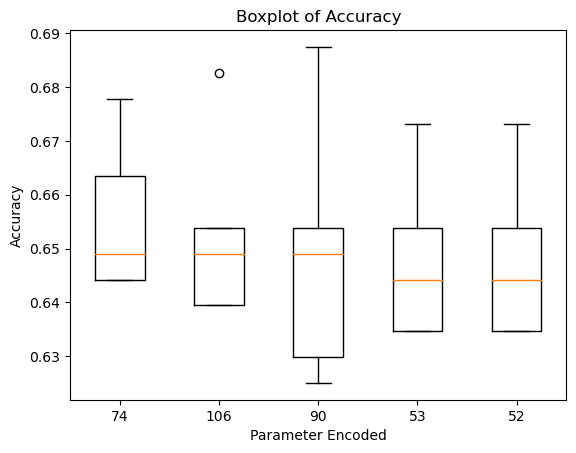

In [34]:
def plot_box_accuracy_top5(search):
    """Plots top 5 models

    Args:
        search: either gridsearch or randomsearch
    """
    results= pd.DataFrame(search.cv_results_).sort_values(by = ["rank_test_score"])
    top5_res = results.head()[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
    results_specific = {}
    for i in top5_res.index:
        l = []
        for k in range(5):
            l.append(results.loc[i, f"split{k}_test_score"])
        results_specific[i] = l
    plt.boxplot(list(results_specific.values()))
    plt.xticks(range(1, len(results_specific) + 1), results_specific.keys())
    plt.xlabel("Parameter Encoded")
    plt.ylabel("Accuracy")
    plt.title("Boxplot of Accuracy")
    plt.show()

plot_box_accuracy_top5(grid_search)

Using these insights, we see that indeed the model selected by grid search seems to be the best indeed, as the values are distributed on higher accuracy values. Nonetheless, it remains interesting to keep the previous observations about the differences of the model in mind, as one might want to analyze the results further.

### Test

Given the best model, let's now measure the performance on the test. First, let's test the accuracy of the model as is.

In [35]:
best_log = LogisticRegression(C= 0.05, penalty="l1", solver="saga", multi_class="multinomial", random_state=42)
best_log.fit(X_train, y_train)
best_log_test_pred = best_log.predict(X_test)
print(f"Accuracy: {best_log.score(X_test, y_test)}")

Accuracy: 0.6192307692307693


The accuracy we got at the very beginning with the default model was 0.6115, and now we got 0.6192. Thus we can say that a slight improvement has been made (it would have been strange otherwise), but it's still not big at all. Let's now check the confusion matrix.

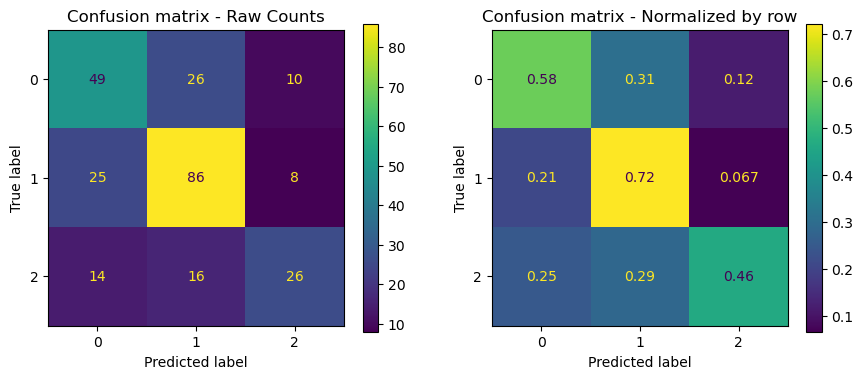

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))
    axs[0].set_title("Confusion matrix - Raw Counts")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=axs[0])
    axs[1].set_title("Confusion matrix - Normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=axs[1], normalize="true")
    plt.show()
    
plot_confusion_matrix(y_test, best_log_test_pred)

The metrics that we're interested in generally are:
- Accuracy (already seen): the proportion of the total number of correct predictions that were correct.
- Precision: the ratio $\frac{tp}{tp + fp}$ where $tp$ is the number of true positives and $fp$ the number of false positives.
- Recall: the ratio $\frac{tp}{tp + fn}$ where $fn$ the number of false negatives.
- F1 Score: a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

Let's look at these metrics.

In [37]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, best_log_test_pred, digits=4)
print("Classification Report:\n", classification_metrics)

Classification Report:
               precision    recall  f1-score   support

           0     0.5568    0.5765    0.5665        85
           1     0.6719    0.7227    0.6964       119
           2     0.5909    0.4643    0.5200        56

    accuracy                         0.6192       260
   macro avg     0.6065    0.5878    0.5943       260
weighted avg     0.6168    0.6192    0.6159       260



Let's analyze the results carefully:
- Precision: Class 1 has the highest precision (0.6719), so when the model predicts an instance to be in class 1, it is correct 67.19% of the time. Class 0 and class 2 have lower precision values of 0.5568 and 0.5909, respectively.

- Recall: Class 1 has the highest recall (0.7227), indicating that the model is able to identify 72.27% of the instances belonging to class 1. Class 0 and class 2 have lower recall values of 0.5765 and 0.4643, respectively.

- F1-score: Class 1 has the highest F1-score (0.6964), followed by class 0 (0.5665) and class 2 (0.5200).

Overall, the model's performance seems to be moderate, with higher precision, recall, and F1-score achieved for class 1 compared to the other classes. Class 2 has the lowest performance based on precision, recall, and F1-score.  Notice that these metrics are clearly correlated with the balance in the dataset, as they show that the higher the number samples, the better the metrics. Thus the frequency might play a role.

## Random Forest

Again, since random forests are ensembles of decision trees, there's no need to do feature scaling or centering. Let's start with the default option.

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print(f"Accuracy: {rf.score(X_test, y_test)}")

Accuracy: 0.7423076923076923


Thus we get 74.2% accuracy, which is not surprising once again. Let's visualize one of the trees, just for illustration purposes.

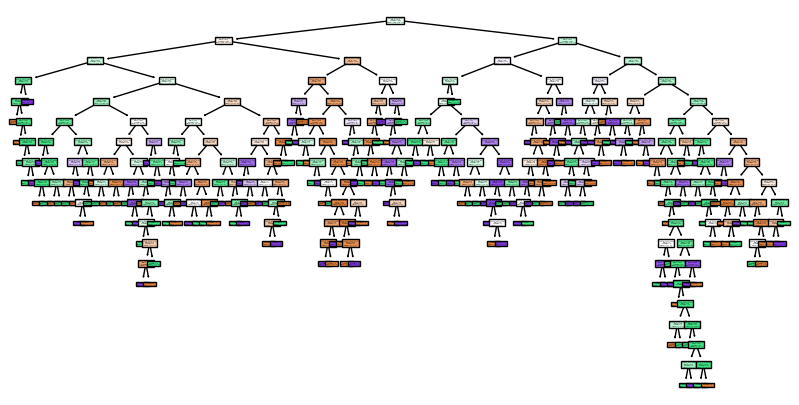

In [39]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5))
tree.plot_tree(rf.estimators_[0],
               feature_names = df_features.columns,
               filled = True);

### Hyperparameter Selection

Let's now perform hyperparameter selection. Since the hyperparameters space is much larger than before, I will perform random search, which randomly tries the combinations, to optimize the computational time.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 15)] # number of trees
criterion = ["gini", "entropy"]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # maximum number of splits for each tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # # min number of samples required to split a node
min_samples_leaf = [1, 2, 4] # # min number of samples required at each leaf node
max_features = ["auto", "sqrt", "log2"] # features to consider at every split
bootstrap = [True, False] # method of selecting samples for training each tree

random_param_grid = {"n_estimators": n_estimators,
                     "criterion": criterion,
                     "max_depth": max_depth,
                     "min_samples_split": min_samples_split,
                     "min_samples_leaf": min_samples_leaf,
                     "max_features": max_features,
                     "bootstrap": bootstrap}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_param_grid, cv = 5, scoring="accuracy",
                                   verbose=1, n_jobs=-1, random_state=42, n_iter=200)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 80, 151, 222, 292,
                                                         363, 434, 504, 575,
                                                         646, 717, 787, 858,
                                                         929, 1000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [41]:
print(f"Best Parameters: {random_search.best_params_}\nBest Mean Accuracy Score : {random_search.best_score_}\nIndex: {random_search.best_index_}")

Best Parameters: {'n_estimators': 363, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 110, 'criterion': 'gini', 'bootstrap': False}
Best Mean Accuracy Score : 0.7317307692307693
Index: 162


Again, it becomes fundamental to understand whether it is actually the best, or if there are any statistical fluctuations to keep into account. I'll repeat the same heuristic procedure done above, plotting the boxplot of the top 5 models

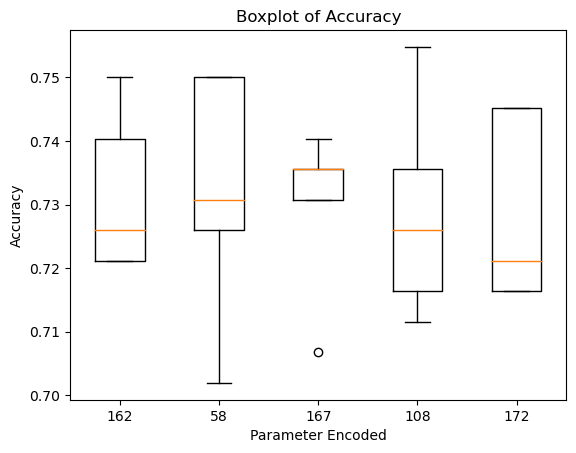

In [42]:
plot_box_accuracy_top5(random_search)

Even though the supposedly best-performing model has a low median, it has most values that are distributed highly. Thus it makes sense to keep it as the best model. Moreover, among these models, it has a low number of trees (although not the lowest, as the next cell shows in n_estimators), which could be possibly better for interpretation purposes of the results.

In [43]:
results_rf = pd.DataFrame(random_search.cv_results_).sort_values(by = ["rank_test_score"])
top5_res_rf = results_rf.head()[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
top5_res_rf

,params,rank_test_score,mean_test_score,std_test_score
162,"{'n_estimators': 363, 'min_samples_split': 2, ...",1,0.731731,0.011538
58,"{'n_estimators': 717, 'min_samples_split': 5, ...",2,0.731731,0.017834
167,"{'n_estimators': 292, 'min_samples_split': 2, ...",3,0.729808,0.011932
108,"{'n_estimators': 1000, 'min_samples_split': 2,...",4,0.728846,0.015385
172,"{'n_estimators': 434, 'min_samples_split': 2, ...",5,0.728846,0.013462


### Test

Let's test the best model.

In [44]:
best_rf = RandomForestClassifier(n_estimators= 363,
                                 min_samples_split= 2,
                                 min_samples_leaf = 1,
                                 max_features = "log2",
                                 max_depth = 110,
                                 criterion = "gini",
                                 bootstrap = False, random_state=42)
best_rf.fit(X_train, y_train)
best_rf_test_pred = best_rf.predict(X_test)
print(f"Accuracy: {best_rf.score(X_test, y_test)}")

Accuracy: 0.7692307692307693


We see a final accuracy of 76.9%, which is an interesting improvement with respect to the initial default model, where we reached an accuracy of 74%. Let's now check the other statistics.

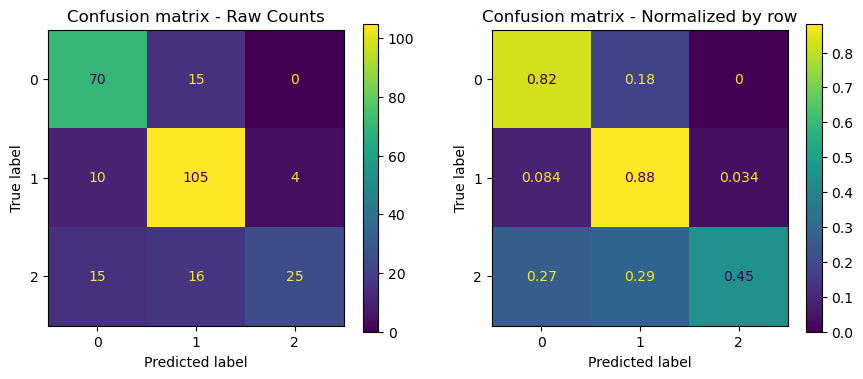

Classification Report:
               precision    recall  f1-score   support

           0     0.7368    0.8235    0.7778        85
           1     0.7721    0.8824    0.8235       119
           2     0.8621    0.4464    0.5882        56

    accuracy                         0.7692       260
   macro avg     0.7903    0.7174    0.7298       260
weighted avg     0.7799    0.7692    0.7579       260



In [45]:
plot_confusion_matrix(y_test, best_rf_test_pred)
classification_metrics = classification_report(y_test, best_rf_test_pred, digits=4)
print("Classification Report:\n", classification_metrics)

Compared to logistic regression, we see improvements in precision, recall, and F1-score for most classes, resulting in a higher overall accuracy. However, it is important to note that the recall for class 2 has decreased. Thus is seems clear now that the least present class struggles to be classified properly.

# Balanced Learning

The previous models had clear issues in classifying the minority class, due to the imbalance. One way to handle the imbalance is by either undersampling (deleting examples from the majority class), or oversampling (duplicate examples from the minority class). I will perform both using the same methodologies described previously, so I will be more brief in the explanations of the methods, as they will be the same, and focus more on the results. 

For the implementation-wise view, I will use the _imbalanced-learn_ library which will help me in this. I will leave the test set unaltered since it will represent the "real-world" distribution of the model.

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

In [47]:
print(f"Oversampled:\n{y_train_oversampled.value_counts()}\nUndersampled:\n{y_train_undersampled.value_counts()}\nOriginal:\n{y_train.value_counts()}")

Oversampled:
1    477
2    477
0    477
Name: label, dtype: int64
Undersampled:
0    225
1    225
2    225
Name: label, dtype: int64
Original:
1    477
0    338
2    225
Name: label, dtype: int64


As we can see we have now added more data in the first case, and removed it in the second one. Obviously, there are drawbacks to this: by oversampling we might add patterns that are not true and thus overrepresent them in the minority class unnecessarily; instead by undersampling, we may remove valuable information in the overrepresented classes and decrease the sample size.

This said, none of these methods are optimal _a priori_ and neither unique, since there's no unified approach in how to tackle the unbalance. As a matter of fact, one could also add class weights, adjusting the class weights during model training to give more importance to the minority class samples. Yet, for the purposes of the project, I'll stick with these two methods, as they might indicate the relevance of the imbalance, and see their perfomance. 

The strategy will be the same as applied previously: for each algorithm: 
- run a default model.
- do hyperparameter selection.
- check performance metrics on the test set. 

## Oversampled Data

Let's start with the oversampled data.

### Logistic Regression


In [48]:
log_reg_over = LogisticRegression(random_state=42)
log_reg_over.fit(X_train_oversampled, y_train_oversampled)
print(f"Accuracy: {log_reg_over.score(X_test, y_test)}")

Accuracy: 0.5807692307692308


The accuracy is very bad. I'll inspect a possible reason for this drop later on. Let's perform hyperparameter selection.

In [49]:
grid_search_over = GridSearchCV(estimator=log_reg_over, param_grid=param_grid, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search_over.fit(X_train_oversampled, y_train_oversampled)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
770 fits failed out of a total of 1760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packag

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 30, 50, 80,
                               100],
                         'multi_class': ['multinomial', 'ovr'],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [50]:
print(f"Best Parameters: {grid_search_over.best_params_}\nBest Mean Accuracy Score : {grid_search_over.best_score_}\nIndex: {grid_search_over.best_index_}")

Best Parameters: {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Mean Accuracy Score : 0.6485222094978192
Index: 20


In the default model, we had 0.58, but now 0.65, so it's quite an interesting improvement. Let's check the other best models.

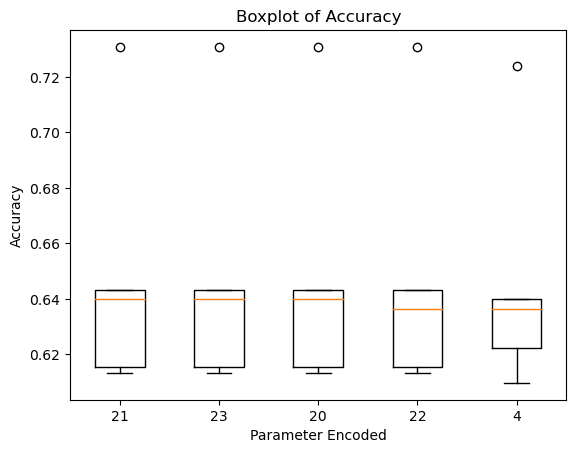

In [51]:
plot_box_accuracy_top5(grid_search_over)

They're all fairly similar, with a big outlier (this might be related probably to the way in which the sampling was made in the cross-validation). Let's keep the model as is and test it.

Accuracy: 0.5846153846153846
Classification Report:
               precision    recall  f1-score   support

           0     0.5301    0.5176    0.5238        85
           1     0.7273    0.6050    0.6606       119
           2     0.4615    0.6429    0.5373        56

    accuracy                         0.5846       260
   macro avg     0.5730    0.5885    0.5739       260
weighted avg     0.6056    0.5846    0.5893       260



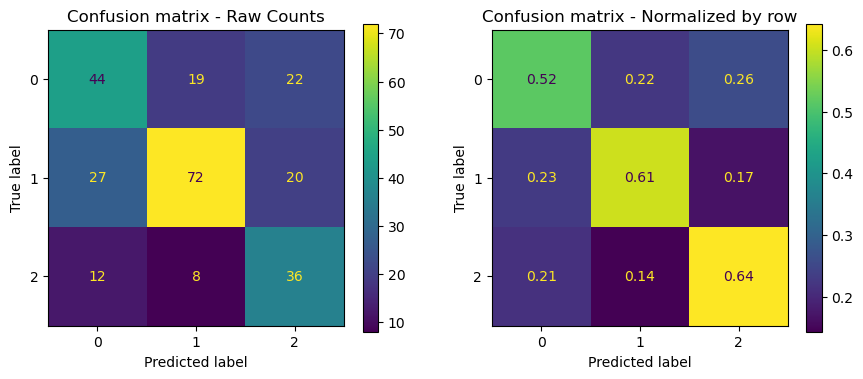

In [52]:
best_log_over = LogisticRegression(C= 0.001, penalty="l2", solver="newton-cg", multi_class="ovr", random_state=42)

def plot_results(model, X_training, y_training):
    """
    Function to plot the results in a faster way
    """ 
    
    model.fit(X_training, y_training)
    model_test_pred = model.predict(X_test)
    print(f"Accuracy: {model.score(X_test, y_test)}")
    classification_metrics = classification_report(y_test, model_test_pred, digits=4)
    print("Classification Report:\n", classification_metrics)
    plot_confusion_matrix(y_test, model_test_pred)
    
plot_results(best_log_over, X_train_oversampled, y_train_oversampled)

Clearly, oversampling reduced the performance of logistic regression, making worse what had already been bad.
Even though it can be hard to understand why, I think that one possible reason is due to the further overlap in the data that oversampling causes. That is, the separation between the data might have become even worse than before, due to the presence of further samples, making it harder to logistic regression to find the optimal parameters.

### Random Forest

Let's try it by default.

In [53]:
rf_over = RandomForestClassifier(random_state=42)
rf_over.fit(X_train_oversampled, y_train_oversampled)
print(f"Accuracy: {rf_over.score(X_test, y_test)}")

Accuracy: 0.7384615384615385


It is way better than logistic regression! This might be related to the explanation given in the hypothesis section, being an ensemble method. Let's now do hyperparameter tuning using random search.

In [54]:
random_search_over = RandomizedSearchCV(estimator=rf_over, param_distributions=random_param_grid, cv = 5, scoring="accuracy", 
                                        verbose=1, n_jobs=-1, random_state=42, n_iter=200)
random_search_over.fit(X_train_oversampled, y_train_oversampled)
print(f"Best Parameters: {random_search_over.best_params_}\nBest Mean Accuracy Score : {random_search_over.best_score_}\nIndex: {random_search_over.best_index_}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'n_estimators': 717, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': False}
Best Mean Accuracy Score : 0.881957067322921
Index: 58


Very big improvement, with an average accuracy of 0.882! We'll later see if this is an overfit, since it is likely to occur, or if it generalizes well. But now, let's check the best-performing models. 

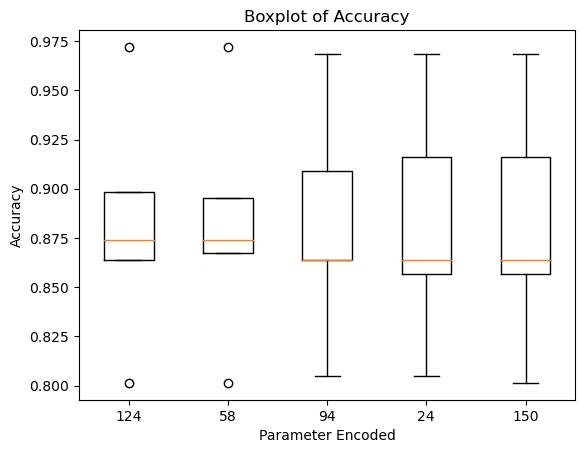

In [55]:
plot_box_accuracy_top5(random_search_over)

Apparently finding the best parameters showed us that we can achieve quite a good accuracy, as the other models have a similar median value and distribution. Yet, the best two seem identically distributed. Let's check them a bit more.

In [56]:
r = pd.DataFrame(random_search_over.cv_results_).sort_values(by = ["rank_test_score"]).head()[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
r[["params"]][:2].iloc[0,0], r[["params"]][:2].iloc[1,0]

({'n_estimators': 929,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 70,
  'criterion': 'entropy',
  'bootstrap': False},
 {'n_estimators': 717,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': 50,
  'criterion': 'entropy',
  'bootstrap': False})

They achieve the same exact mean accuracy but with a slightly different standard deviation. Moreover, some hyperparameters are different. In the end, just like in the previous case, for simplicity, it makes sense to keep the first-ranked model for the testing phase.

Accuracy: 0.7730769230769231
Classification Report:
               precision    recall  f1-score   support

           0     0.7711    0.7529    0.7619        85
           1     0.7500    0.9076    0.8213       119
           2     0.8788    0.5179    0.6517        56

    accuracy                         0.7731       260
   macro avg     0.8000    0.7261    0.7450       260
weighted avg     0.7846    0.7731    0.7653       260



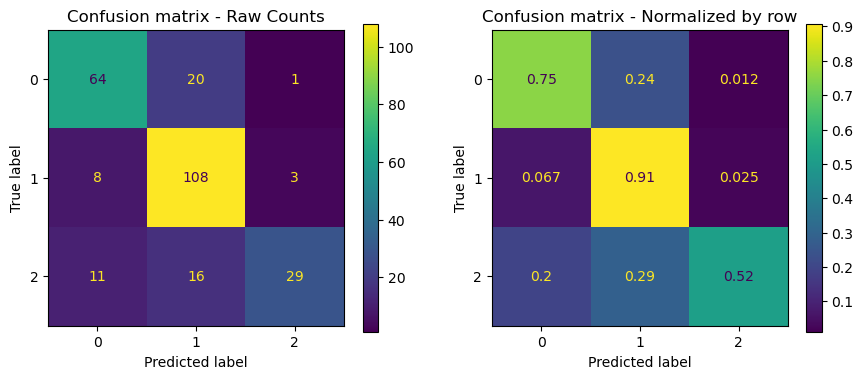

In [57]:
best_rf_over = RandomForestClassifier(n_estimators=717, min_samples_split=5, min_samples_leaf=1, max_features="log2",
                                      max_depth=50, criterion="entropy", bootstrap=False, random_state=42)
plot_results(best_rf_over, X_train_oversampled, y_train_oversampled)

We see that the accuracy in the test dropped, so probably while training it overfitted (as often happens with RF), but it remains the highest so far. It is interesting to notice that class 2 is the one with the highest precision (but the lowest recall due to the trade-off, which is further indicated by the lower f1-score), so oversampling increased its classification indeed. Overall, it seems pretty good.

## Undersampled Data

Let's now use the undersampled case.

### Logistic Regression

First, the basic model.

In [58]:
log_reg_under = LogisticRegression(random_state=42)
log_reg_under.fit(X_train_undersampled, y_train_undersampled)
print(f"Accuracy: {log_reg_under.score(X_test, y_test)}")

Accuracy: 0.6269230769230769


Still has low accuracy, but better than the oversampled case. Let's perform hyperparameter selection.

In [59]:
grid_search_under = GridSearchCV(estimator=log_reg_under, param_grid=param_grid, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search_under.fit(X_train_undersampled, y_train_undersampled)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
770 fits failed out of a total of 1760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sandr\anaconda3\envs\machine_learning\lib\site-packag

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 30, 50, 80,
                               100],
                         'multi_class': ['multinomial', 'ovr'],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [60]:
print(f"Best Parameters: {grid_search_under.best_params_}\nBest Mean Accuracy Score : {grid_search_under.best_score_}\nIndex: {grid_search_under.best_index_}")

Best Parameters: {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Mean Accuracy Score : 0.6311111111111111
Index: 20


This is the same optimal model obtained in the oversampled case! Let's check the other best performing models.

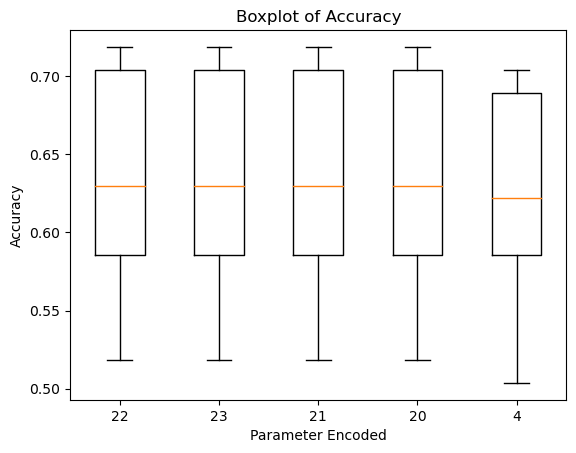

In [61]:
plot_box_accuracy_top5(grid_search_under)

Again, among these models, the distribution is the same. Since we have understood by now that the differences are negligible for the purpose of the project and for the interpretation of the results, I will keep the best model. Let's now test it.

Accuracy: 0.6115384615384616
Classification Report:
               precision    recall  f1-score   support

           0     0.5667    0.6000    0.5829        85
           1     0.7423    0.6050    0.6667       119
           2     0.4932    0.6429    0.5581        56

    accuracy                         0.6115       260
   macro avg     0.6007    0.6160    0.6026       260
weighted avg     0.6312    0.6115    0.6159       260



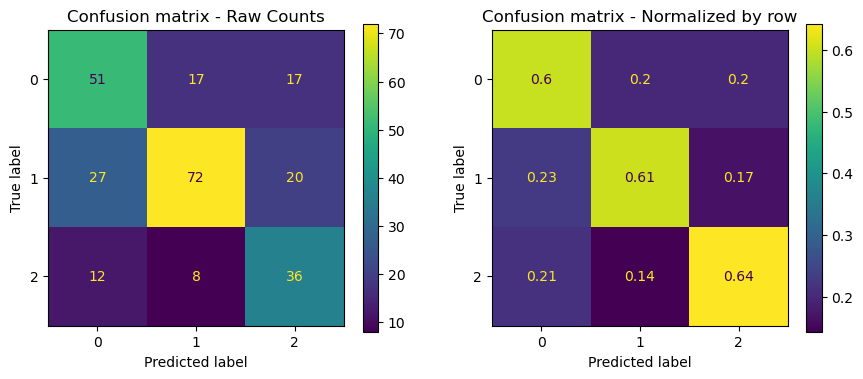

In [62]:
best_log_under = LogisticRegression(random_state=42, C = 0.001, multi_class= 'ovr', penalty= 'l2', solver = 'newton-cg')
plot_results(best_log_under, X_train_undersampled, y_train_undersampled)

Having the same optimal model obtained in the oversampled data with an accuracy of 0.585, in this case, we get a better one of 0.612. This clearly indicates that previosuly the model struggled to separate the classes having more data, while here, with a reduced number of samples, the predictions are improved.

Still, the model's performance appears to be just modest, with poor precision, recall, and F1 scores across different classes.

### Random Forest

The basic model

In [63]:
rf_under = RandomForestClassifier(random_state=42)
rf_under.fit(X_train_undersampled, y_train_undersampled)
print(f"Accuracy: {rf_under.score(X_test, y_test)}")

Accuracy: 0.6884615384615385


Now instead we get an accuracy of 0.688, which is lower compared to the default model in the oversampled data (0.773). An intuitive way of why it might be the case is due to increasing the number of instances in the minority class in the previous case, making it more representative in the dataset. Indeed, random forest benefits from having a balanced class representation, as it relies on diversity among decision trees, so there are more instances that contribute to learning.

In [64]:
random_search_under = RandomizedSearchCV(estimator=rf_under, param_distributions=random_param_grid, cv = 5, scoring="accuracy", 
                                        verbose=1, n_jobs=-1, random_state=42, n_iter=200)
random_search_under.fit(X_train_undersampled, y_train_undersampled)
print(f"Best Parameters: {random_search_under.best_params_}\nBest Mean Accuracy Score : {random_search_under.best_score_}\nIndex: {random_search_under.best_index_}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'n_estimators': 292, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': False}
Best Mean Accuracy Score : 0.6814814814814815
Index: 19


Compared to the oversampled data, we ended up with a worse model, since there we ended up with 0.881957067322921 mean accuracy for the best model. Let's check the others.

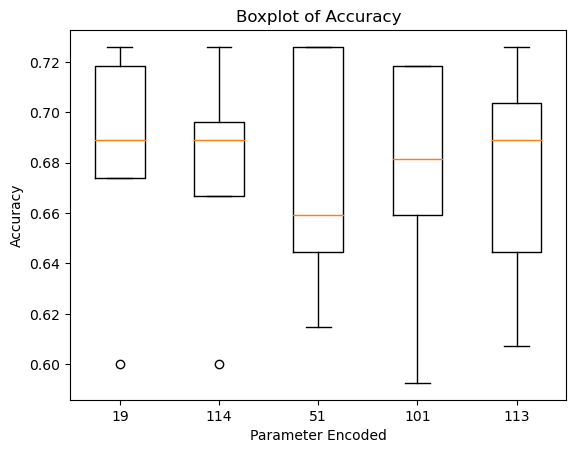

In [65]:
plot_box_accuracy_top5(random_search_under)

Let's stick the the best model, as they're similar. Let's test.

Accuracy: 0.6961538461538461
Classification Report:
               precision    recall  f1-score   support

           0     0.6705    0.6941    0.6821        85
           1     0.8387    0.6555    0.7358       119
           2     0.5570    0.7857    0.6519        56

    accuracy                         0.6962       260
   macro avg     0.6887    0.7118    0.6899       260
weighted avg     0.7230    0.6962    0.7002       260



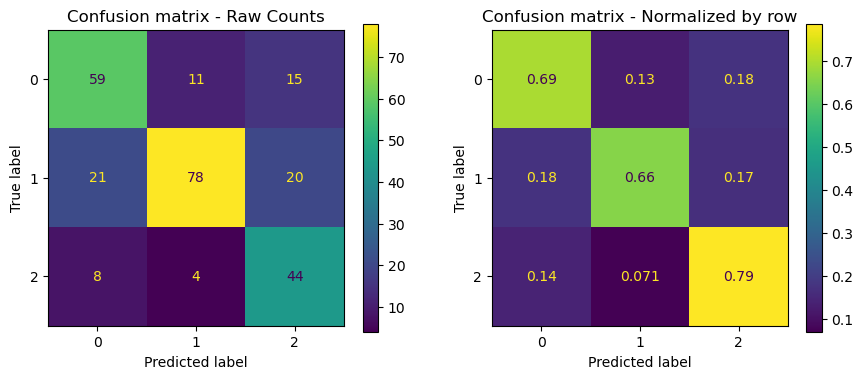

In [66]:
best_rf_under = RandomForestClassifier(n_estimators=292, min_samples_split=2, min_samples_leaf=2, max_features="sqrt",
                                      max_depth=50, criterion="gini", bootstrap=False, random_state=42)
plot_results(best_rf_under, X_train_undersampled, y_train_undersampled)

In general, it did achieve fairly good results, given our context, but still not optimal. Interestingly, the precision for class 2 is lower in the undersampled model (0.5570) compared to the oversampled model (0.8788) and the opposite for recall (as imaginable). This confirms again the relevance of oversampling in the random forest model.

# Summary, Model Improvement and Model Selection

Let's summarize the results.

In [67]:
acc_entire_log = best_log.score(X_test, y_test)
acc_over_log = best_log_over.score(X_test, y_test)
acc_under_log = best_log_under.score(X_test, y_test)
acc_entire_rf = best_rf.score(X_test, y_test)
acc_over_rf = best_rf_over.score(X_test, y_test)
acc_under_rf = best_rf_under.score(X_test, y_test)

data = {
    "Logistic Regression": [acc_entire_log, acc_over_log, acc_under_log],
    "Random Forest": [acc_entire_rf, acc_over_rf, acc_under_rf]
}
index = ["Unbalanced Data", "Oversampled Data", "Undersampled Data"]
summary_accuracy = pd.DataFrame(data, index=index)
summary_accuracy

,Logistic Regression,Random Forest
Unbalanced Data,0.619231,0.769231
Oversampled Data,0.584615,0.773077
Undersampled Data,0.611538,0.696154


In all cases, the test accuracy is not that amazing, at times actually very bad. Moreover, random forest outperforms logistic regression in every type of training data. All of this is in line with the hypotheses written at the beginning.

What was surprising, personally, was the big discrepancy between the two models and the fact that logistic regression really did a poor overall job. In addition, it is interesting to see how in the oversampled data, the logistic accuracy dropped while random's increased. As already explained, it might be due to the presence of more samples, which make it more difficult to find a decision boundary for logistic and make it easier to a more balanced diversity for random forest. Instead, by undersampling the data, logistic regression showed no big difference from the original data, while random forest dramatically dropped. 

Of course, these tests have been carried out in the most simple way and to properly understand the model performance one could investigate further. Still, given the purpose of the project and data, I believe that the analysis of the results is satisfactory.

This said it is time to select the best model. Obviously, the choice comes down to a random forest, trained on either the unbalanced or oversampled data. Since both measures perform similarly and were found with random search only, I will select those two models and run a small grid search in a neighborhood of the optimal parameter space, previously found with random search, to see if any improvement can be made.

## Improving RF trained on unbalanced data

In [68]:
best_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, max_depth=110, max_features='log2',
                       n_estimators=363, random_state=42)>

Interesting parameters to look at might be maximal depth and number of trees. I will choose only these two in this tuning phase, keeping the others fixed, to have the possibility to interpret the data and avoid increasing the computational cost of grid search. I will search in a space that is close to those values.

In [69]:
improved_best_rf = RandomForestClassifier(bootstrap=False, max_features='log2', random_state=42)

improved_n_estimators = [int(x) for x in np.linspace(start = 300, stop = 400, num = 10)]
improved_max_depth = [int(x) for x in np.linspace(100, 130, num = 5)]
improved_max_depth.append(None)

param_grid_one = {"n_estimators": improved_n_estimators, "max_depth": improved_max_depth}

grid_search = GridSearchCV(estimator=improved_best_rf, param_grid=param_grid_one, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False,
                                              max_features='log2',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [100, 107, 115, 122, 130, None],
                         'n_estimators': [300, 311, 322, 333, 344, 355, 366,
                                          377, 388, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [70]:
print(f"Best Parameters: {grid_search.best_params_}\nBest Mean Accuracy Score : {grid_search.best_score_}\nIndex: {grid_search.best_index_}")

Best Parameters: {'max_depth': 100, 'n_estimators': 344}
Best Mean Accuracy Score : 0.7336538461538461
Index: 4


Now the mean validation accuracy is 0.73365. The one found initially with random search was 0.73173. So, the accuracy increased just a tiny bit. This might indicate a sort of saturation of performance in the parameter space with our data. Let's plot the validation scores at each combination.

In [71]:
def plot_scores(test_scores, train_scores):
    plt.plot(test_scores, label='test')
    plt.plot(train_scores, label='train')
    plt.xlabel("Candidate")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

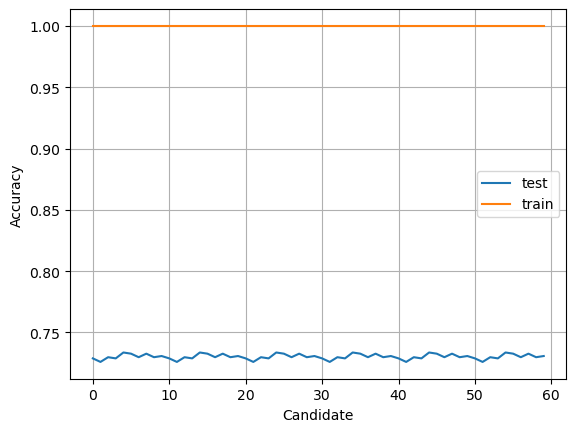

In [72]:
test_scores_one = grid_search.cv_results_['mean_test_score']
train_scores_one = grid_search.cv_results_['mean_train_score'] 
plot_scores(test_scores_one, train_scores_one)

As we can see we get perfect classifiers in random forests in training, because they easily tend to overfit the data with many trees, in our case 100. However, this shouldn't worry us because we know that the validation error is optimal, as the results were already obtained optimally from random search previously. So this is the best we can get.

I'll test at the end, once I have improved also the other model.

## Improving RF trained on oversampled data

In [73]:
best_rf_over.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,
                       max_features='log2', min_samples_split=5,
                       n_estimators=717, random_state=42)>

Again, to keep the results consistent, let's optimize the same hyperparameters, but close to the optimal values of this specific model instead.

In [74]:
improved_best_rf_over = RandomForestClassifier(bootstrap=False, criterion = "entropy", max_features='log2', min_samples_split = 5, random_state=42)

improved_n_estimators_over = [int(x) for x in np.linspace(start = 650, stop = 750, num = 10)]
improved_max_depth_over = [int(x) for x in np.linspace(40, 60, num = 5)]
improved_max_depth_over.append(None)

param_grid_over = {"n_estimators": improved_n_estimators_over, "max_depth": improved_max_depth_over}

grid_search = GridSearchCV(estimator=improved_best_rf_over, param_grid=param_grid_over, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_oversampled, y_train_oversampled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy',
                                              max_features='log2',
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 45, 50, 55, 60, None],
                         'n_estimators': [650, 661, 672, 683, 694, 705, 716,
                                          727, 738, 750]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [75]:
print(f"Best Parameters: {grid_search.best_params_}\nBest Mean Accuracy Score : {grid_search.best_score_}\nIndex: {grid_search.best_index_}")

Best Parameters: {'max_depth': 40, 'n_estimators': 738}
Best Mean Accuracy Score : 0.8826588046100241
Index: 8


Thus the optimal model has a mean accuracy of 0.88266. Previously, it was 0.88196; so now we had again a little increase.

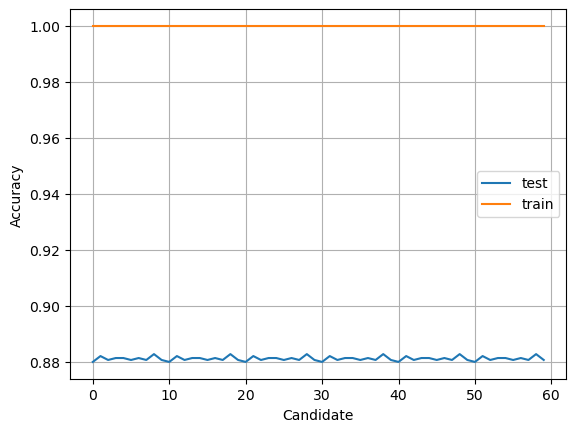

In [76]:
test_scores_over = grid_search.cv_results_['mean_test_score']
train_scores_over = grid_search.cv_results_['mean_train_score'] 
plot_scores(test_scores_over, train_scores_over)

Similarly to the other model, it overfits in training, but I shall repeat that it is not an issue since tuning the hyperparameters avoids perpetuating the overfit in the validation set.

## Model Selection

It's time to run the models on the test set and choose the best one. 

In [24]:
final_rf_unbalanced = RandomForestClassifier(bootstrap=False, max_features='log2', random_state=42,
                                             max_depth=100, n_estimators=344) # previous mean acc: 0.73365
final_rf_oversampled = RandomForestClassifier(bootstrap=False, criterion = "entropy", max_features='log2', min_samples_split = 5, random_state=42,
                                              max_depth=40, n_estimators=738) # previous mean acc: 0.88266

In [25]:
final_rf_unbalanced.fit(X_train, y_train)
final_rf_unbalanced_test_pred = final_rf_unbalanced.predict(X_test)
print(f"Accuracy of RF UNBALANCED: {final_rf_unbalanced.score(X_test, y_test)}")
final_rf_oversampled.fit(X_train_oversampled, y_train_oversampled)
final_rf_oversampled_test_pred = final_rf_oversampled.predict(X_test)
print(f"Accuracy of RF OVERSAMPLED: {final_rf_oversampled.score(X_test, y_test)}")

Accuracy of RF UNBALANCED: 0.7653846153846153
Accuracy of RF OVERSAMPLED: 0.7730769230769231


Since accuracy is the metric that we've looked at the most and the one we care about the most, we can say that **the best model is the random forest trained on the oversampled data**, namely:
```python
RandomForestClassifier(bootstrap=False, criterion="entropy", max_features="log2", min_samples_split=5, random_state=42, max_depth=40, n_estimators=738)
```

Notice that even though the mean validation accuracy was 0.88, the test accuracy dropped to 0.773. This is probably due to the overfitting given by the oversampling effect, which increased the variance of the model, making it harder to predict the labels with lower-represented classes in the test set. Moreover, it is interesting to see how the accuracy of the rf trained on unbalanced data is just a tiny bit lower here compared to the original model found with random search only, so now it got even worse (yet it's almost negligible).

Let's now look at the other performance metrics of our best model.

Accuracy: 0.7730769230769231
Classification Report:
               precision    recall  f1-score   support

           0     0.7711    0.7529    0.7619        85
           1     0.7500    0.9076    0.8213       119
           2     0.8788    0.5179    0.6517        56

    accuracy                         0.7731       260
   macro avg     0.8000    0.7261    0.7450       260
weighted avg     0.7846    0.7731    0.7653       260



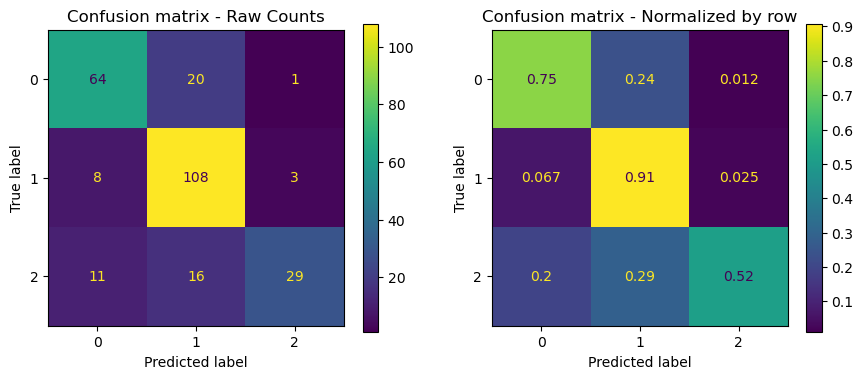

In [79]:
plot_results(final_rf_oversampled, X_train_oversampled, y_train_oversampled)

If one looks carefully, there is no difference between the model found with random search only and this one found with grid search too, not even in the accuracy! Thus optimizing once again has been useless, _a posteriori_. Yet, we notice that training on the oversampled data dramatically increased the precision of class 2, which I want to remind it was always the one with the lowest precision score and worse metrics overall.

I once again recall that the model found may not be optimal, due to computational constraints. Moreover, I do not claim the methods adopted to tackle the imbalance are the best ones too, as the literature proposes various options and I opted for the ones that made more sense given the aim of the project. It would be thus interesting to later explore those options and see whether any improvement can be made in that direction. After all, real data may end up being unbalanced very likely, so knowing how to deal with it becomes fundamental.

# Extra Model: KNN

KNN has the interesting property of being non-parametric, so it does not require specific assumptions about the shape or structure of the data, and of being distance based. This premise makes it possible to be a good algorithm, hopefully better than LR and RF, as KNN might handle the overlap of the data much better. In this section, I will explore it and see if there is any meaningful conclusion to be drawn. 

First of all it becomes important to scale the data in the same range, as we don't want the values to affect the nearest neighbors distribution and we want all features to have equal importance.

I will normalize the values between 0 and 1 and train on all three types of data (unbalanced, oversampled, undersampled).

## Unbalanced Data

In [80]:
# unscaled values
X_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,0.002766,0.459789,0.521148,0.390862,0.793814,0.016615,0.173467,0.117809,0.114347,0.515535,...,-0.246020,0.730998,0.067692,0.048322,0.153095,0.348754,0.193021,0.106075,-0.474429,0.076886
std,3.127966,2.961732,3.025517,3.007474,3.110093,2.940108,3.081487,0.993074,1.015986,2.821706,...,3.007721,2.916150,1.033858,0.975681,2.856638,3.010098,2.987713,0.991749,2.810417,0.976694
min,-10.224580,-9.175228,-8.181576,-7.720225,-10.306490,-8.761285,-9.044988,-3.539026,-2.756040,-8.513150,...,-9.125584,-7.497496,-3.032916,-3.025494,-8.939708,-9.488369,-9.736704,-2.735998,-10.796589,-2.856607
25%,-2.116023,-1.535390,-1.550132,-1.656723,-1.292298,-2.022489,-1.960708,-0.582369,-0.562664,-1.346680,...,-2.075939,-1.169682,-0.657390,-0.610445,-1.828149,-1.506854,-1.903207,-0.612689,-2.392067,-0.591001
50%,0.047052,0.460029,0.358881,0.429578,0.954517,-0.015195,0.057953,0.119336,0.119952,0.335230,...,-0.322708,0.798106,0.073696,0.037892,-0.000744,0.407169,0.229600,0.136456,-0.539972,0.087191
75%,2.041505,2.526554,2.508584,2.411075,2.781336,1.875934,2.288726,0.784540,0.818736,2.261125,...,1.673183,2.743787,0.821613,0.722939,2.109707,2.293414,2.082658,0.784529,1.476246,0.761506
max,10.148086,10.166224,9.905998,10.914493,13.483779,9.681095,10.755311,3.152136,4.336729,9.175195,...,9.410880,11.600749,3.171965,3.218397,8.036170,9.494343,11.016773,3.088124,8.044478,3.246657


In [81]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index = X_train.index)

In [82]:
X_train_scaled.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,0.502013,0.498154,0.481144,0.435267,0.466590,0.475964,0.465572,0.546517,0.404692,0.510431,...,0.479032,0.430851,0.499705,0.492292,0.535631,0.518215,0.478461,0.487983,0.547854,0.480643
std,0.153537,0.153129,0.167270,0.161391,0.130730,0.159421,0.155628,0.148416,0.143243,0.159523,...,0.162260,0.152692,0.166620,0.156262,0.168276,0.158570,0.143962,0.170283,0.149164,0.160028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398012,0.394998,0.366630,0.325387,0.378903,0.365397,0.357787,0.441875,0.309241,0.405152,...,0.380312,0.331330,0.382848,0.386786,0.418921,0.420462,0.377455,0.364572,0.446075,0.371212
50%,0.504187,0.498166,0.472173,0.437345,0.473345,0.474239,0.459738,0.546745,0.405482,0.500238,...,0.474895,0.434365,0.500672,0.490621,0.526569,0.521292,0.480223,0.493199,0.544376,0.482332
75%,0.602085,0.605011,0.591022,0.543679,0.550134,0.576781,0.572401,0.646161,0.504003,0.609117,...,0.582569,0.536242,0.621209,0.600336,0.650889,0.620659,0.569512,0.604473,0.651388,0.592816
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that we've scaled the data, let's do a basic model and see its performance.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print(f"Accuracy: {knn.score(X_test, y_test)}")

Accuracy: 0.8807692307692307


The test accuracy is already very good at 0.8808, compared to the other models. Let's improve it by doing hyperparameter selection. For simplicity, I will only consider the number of neighbors $k$. Hence I will keep the $L_2$ norm for the distance and all other default parameters.

In [84]:
n_neighbors = [int(x) for x in np.linspace(1, 50, 12)]

param_grid_knn = {"n_neighbors": n_neighbors}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 9, 14, 18, 23, 27, 32, 36, 41,
                                         45, 50]},
             return_train_score=True, scoring='accuracy', verbose=1)

Best Parameters: {'n_neighbors': 9}
Best Mean Accuracy Score : 0.7432692307692308
Index: 2


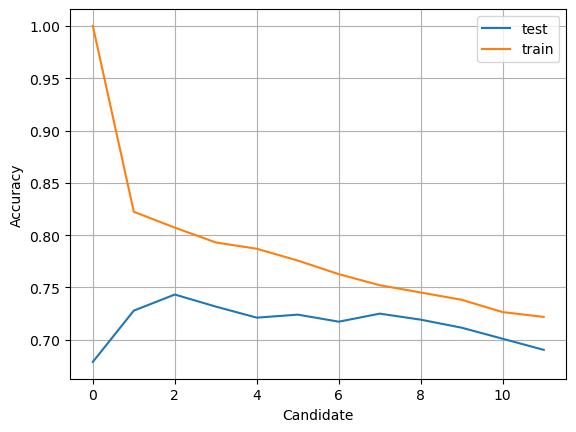

In [85]:
print(f"Best Parameters: {grid_search_knn.best_params_}\nBest Mean Accuracy Score : {grid_search_knn.best_score_}\nIndex: {grid_search_knn.best_index_}")
test_scores_knn = grid_search_knn.cv_results_['mean_test_score']
train_scores_knn = grid_search_knn.cv_results_['mean_train_score'] 
plot_scores(test_scores_knn, train_scores_knn)

Overall accuracy is not bad, but still decreased a lot. Let's test.

Accuracy: 0.8653846153846154
Classification Report:
               precision    recall  f1-score   support

           0     0.8444    0.8941    0.8686        85
           1     0.8760    0.9496    0.9113       119
           2     0.8780    0.6429    0.7423        56

    accuracy                         0.8654       260
   macro avg     0.8662    0.8289    0.8407       260
weighted avg     0.8661    0.8654    0.8609       260



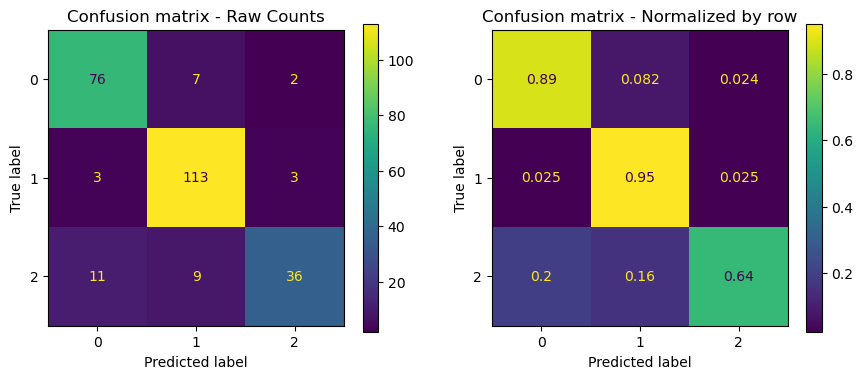

In [88]:
best_knn = KNeighborsClassifier(n_neighbors=9)
best_knn.fit(X_train_scaled, y_train)
best_knn_test_pred = best_knn.predict(X_test)
plot_results(best_knn, X_train_scaled, y_train)

The predictions are very good, with an accuracy of 86.5%! Notice also that the F1 scores are all fairly higher, even though the class 2 still suffers from low recall. Notice though that the default model with k=5 outperformed the optimal model found using grid search, since the previous accuracy was 0.8807. This is a good reminder that the results obtained via a grid search may not always be optimal, but suboptimal, as the optimality is just chosen based on the mean accuracy on a validation set. Still, we can already see how KNN performs much better than the other algorithms!

## Balanced Data

Let's look at the balanced datasets, once again scaled

In [92]:
def scale(data):
    scaled = MinMaxScaler().fit_transform(data)
    return pd.DataFrame(scaled, columns=data.columns, index = data.index)

In [93]:
X_train_scaled_over = scale(X_train_oversampled)
X_train_scaled_under = scale(X_train_undersampled)

In [95]:
knn_over = KNeighborsClassifier()
knn_over.fit(X_train_scaled_over, y_train_oversampled)
print(f"Accuracy oversampled: {knn_over.score(X_test, y_test)}")
knn_under = KNeighborsClassifier()
knn_under.fit(X_train_scaled_under, y_train_undersampled)
print(f"Accuracy undersampled: {knn_under.score(X_test, y_test)}")

Accuracy oversampled: 0.8461538461538461
Accuracy undersampled: 0.8269230769230769


As we can see they both perform well, in a similar fashion to the KNN trained on the unbalanced data. Let's tune the same hyperparameters of before.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'n_neighbors': 1}
Best Mean Accuracy Score : 0.840727565117809
Index: 0


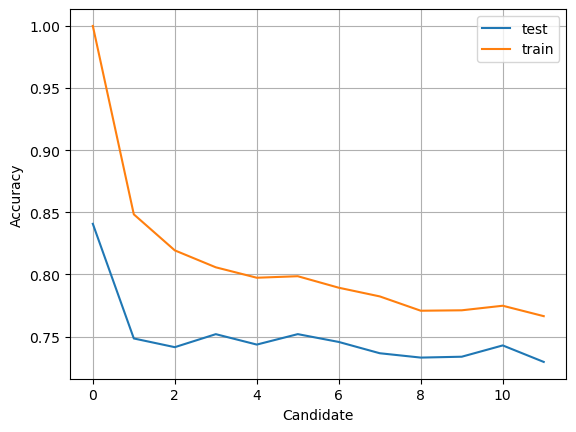

In [97]:
# oversampled 
grid_search_knn_over = GridSearchCV(estimator=knn_over, param_grid=param_grid_knn, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1, return_train_score=True)
grid_search_knn_over.fit(X_train_scaled_over, y_train_oversampled)
print(f"Best Parameters: {grid_search_knn_over.best_params_}\nBest Mean Accuracy Score : {grid_search_knn_over.best_score_}\nIndex: {grid_search_knn_over.best_index_}")
test_scores_knn_over = grid_search_knn_over.cv_results_['mean_test_score']
train_scores_knn_over = grid_search_knn_over.cv_results_['mean_train_score'] 
plot_scores(test_scores_knn_over, train_scores_knn_over)

Strangely, we get that the optimal number of neighbors is 1. Probably this is due to the overpresence of overlapping data points.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'n_neighbors': 41}
Best Mean Accuracy Score : 0.7081481481481481
Index: 9


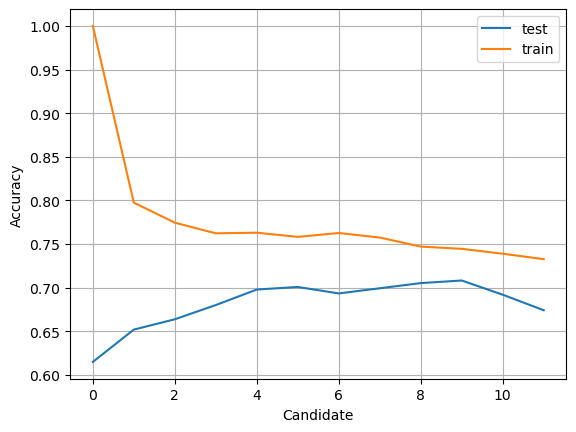

In [98]:
# undersampled 
grid_search_knn_under = GridSearchCV(estimator=knn_under, param_grid=param_grid_knn, cv = 5, scoring="accuracy", verbose=1, n_jobs=-1, return_train_score=True)
grid_search_knn_under.fit(X_train_scaled_under, y_train_undersampled)
print(f"Best Parameters: {grid_search_knn_under.best_params_}\nBest Mean Accuracy Score : {grid_search_knn_under.best_score_}\nIndex: {grid_search_knn_under.best_index_}")
test_scores_knn_under = grid_search_knn_under.cv_results_['mean_test_score']
train_scores_knn_under = grid_search_knn_under.cv_results_['mean_train_score'] 
plot_scores(test_scores_knn_under, train_scores_knn_under)

Here we get more neighbors, probably because having less data we can group the data much better. Yet, in this case the performance is very bad, actually comparable to that of random forest or logistic regression. Let's now test the models.

Accuracy: 0.8192307692307692
Classification Report:
               precision    recall  f1-score   support

           0     0.7865    0.8235    0.8046        85
           1     0.8803    0.8655    0.8729       119
           2     0.7407    0.7143    0.7273        56

    accuracy                         0.8192       260
   macro avg     0.8025    0.8011    0.8016       260
weighted avg     0.8196    0.8192    0.8192       260



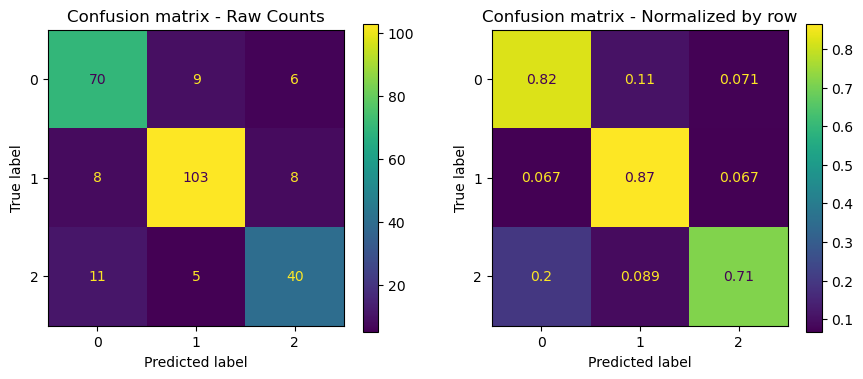

In [101]:
# oversampled
best_knn_over = KNeighborsClassifier(n_neighbors=1)
best_knn_over.fit(X_train_scaled_over, y_train_oversampled)
best_knn_over_test_pred = best_knn_over.predict(X_test)
plot_results(best_knn_over, X_train_scaled_over, y_train_oversampled)

Accuracy: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           0     0.8506    0.8706    0.8605        85
           1     0.9259    0.8403    0.8811       119
           2     0.7077    0.8214    0.7603        56

    accuracy                         0.8462       260
   macro avg     0.8281    0.8441    0.8340       260
weighted avg     0.8543    0.8462    0.8483       260



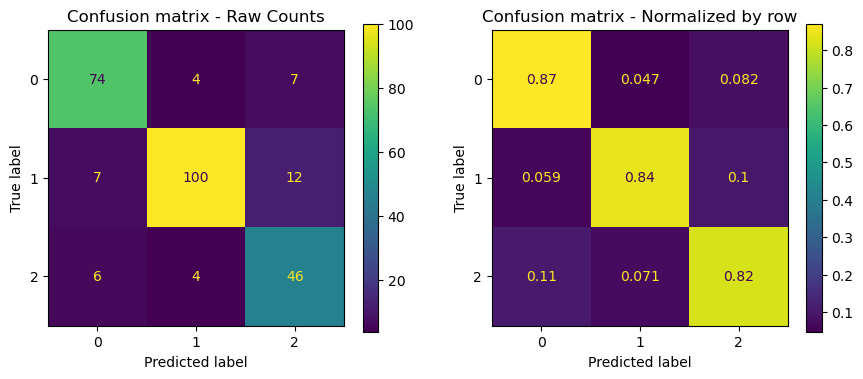

In [102]:
# undersampled
best_knn_under = KNeighborsClassifier(n_neighbors=41)
best_knn_under.fit(X_train_scaled_under, y_train_undersampled)
best_knn_under_test_pred = best_knn_under.predict(X_test)
plot_results(best_knn_under, X_train_scaled_under, y_train_undersampled)

Even though the mean accuracy was better in the oversampled case than the undersampled one, the test accuracy was much better in the undersampled case! Moreover, class 2 is better classified in the model trained on undersampled data.

## Final Comment on KNN Results

Overall we see that KNN performs much better than random forest and logistic regression. As already explained, this might be due to the easiness with which KNN can handle overlapping data. Out of the models I tested, the best performing is the default model (k=5), which outperformed all the other ones with an accuracy of 0.88077. This confirms our hypotheses that KNN might have worker better than LR and RF.

# General Methods of Improvement

To improve the project it could be interesting to see the optimal number of folds to do in cross-validation when doing grid/random search. As a matter of fact, I fixed it to 5 and kept it constant throughout the whole project, but technically, nothing prevented me from choosing another value. In addition, it can be useful to try other methods as well to have a true benchmark of the optimality of the results. Moreover, one could also do some sort of feature selection, for example, based on the feature importance of the random forest algorithm, or select based on PCA components, from which one could train other models too. 

As for the imbalance, I opted for two classical approaches. As it turned out, both had their advantages and disadvantages based on the model, so I had to make some choices in the selection. Another way could have been done by weighting the classes or by using SMOTE (Synthetic Minority Over-sampling Technique), which oversamples the data by generating new synthetic data rather than duplicating existing samples in the minority class, like I did with random oversampling.

# Testing 

This said, let's take the best model to be found for the assignment:
```python
RandomForestClassifier(bootstrap=False, criterion="entropy", max_features="log2", min_samples_split=5, random_state=42, max_depth=40, n_estimators=738)
```
trained on oversampled data. Notice two things:
1. I have previously shown that KNN was better than LR and RF. But for the purpose of the project, I believe that I should stick with one of the assigned models, in order to verify my work properly.
2. I will not retrain the model on the whole training set, because of the empirical law: $$\text{new data} \implies\text{new model} \implies\text{new (hyper)parameters} \implies\text{new performance}$$ but I will keep it with the parameters found by training on ```X_train_oversampled```. Indeed, I trained on ```X_train_oversampled```, which is an oversampled subset of the whole training set. Yet, if I were to test the model, training it on the whole dataset, I should oversample once again, and I could test only via k-fold cross-validation. Thus I will not have any guarantee of the performance of the model on the test set, as labels are not provided. It is still worth noticing that, since the distribution of the data in training and testing is similar, **potentially** there shouldn't be big differences, but, I repeat, I will not have guarantees on the optimality of the results and on how well the model might generalize given the new training. Thus I will keep the training only on ```X_train_oversampled```.

Let's test it.

In [14]:
path_test = "./mldata_0003161492.TEST_FEATURES.csv"
df_test = pd.read_csv(path_test)
df_test

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,-0.968964,-3.299070,0.316449,2.913541,1.378052,-4.789082,1.102889,-1.064815,-0.583756,...,3.177652,0.682577,0.820048,-0.571715,1.040837,-2.615596,-2.555006,-0.074492,-0.470902,2.645981
1,1,-0.037384,4.090001,3.831442,-3.297055,2.235320,1.971541,-4.226986,-0.633068,-0.592646,...,-1.924191,-2.968038,0.390101,0.226713,1.920683,-0.046590,1.058591,-0.147348,-4.472999,-0.034055
2,2,2.246281,1.971346,1.473055,1.868906,4.166793,-1.436315,4.451788,1.117919,0.037955,...,-1.444298,-0.640979,-0.877806,0.682311,1.116611,-1.715130,-3.690751,1.336632,0.147758,1.109408
3,3,-2.170707,-0.636046,-1.562402,2.603993,4.461798,1.763784,4.779638,-1.365072,0.466163,...,4.017243,2.674509,-0.778188,-0.890992,-3.983782,-2.118902,0.810850,0.626824,5.106079,-1.260929
4,4,2.953208,-0.967860,-1.309985,4.613634,3.168028,-4.372624,5.501407,0.422912,1.976515,...,-5.182031,-4.439389,-0.847951,-0.588126,-1.355186,1.338399,-4.654886,0.476784,0.613611,1.269802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1295,0.167112,-1.584155,0.358463,-1.933703,-1.207248,3.395207,-0.188112,-0.708627,-0.342285,...,1.236009,0.856942,-0.514148,2.357837,-2.246253,1.939106,-4.324409,2.333725,0.470990,0.201221
1296,1296,-2.096392,2.548955,1.105912,1.133640,3.909825,-1.012125,0.598317,-0.497226,0.496207,...,-2.363699,-0.086757,0.360890,0.743318,1.904586,3.367378,-1.060967,-0.035720,2.582246,-0.556069
1297,1297,5.850050,-1.794710,2.813757,5.324588,0.005297,4.502203,-1.184838,1.344234,-1.133115,...,0.627046,-0.146467,-0.185609,0.085890,1.050946,0.880209,-1.749746,-0.636707,-2.512131,0.418439
1298,1298,-0.125568,-3.071875,-0.163826,2.795413,0.812271,-1.969756,-3.149634,0.015870,0.868594,...,0.146090,-6.105035,0.196344,-0.226428,-1.456272,4.269436,0.536172,1.129496,-3.662254,0.934525


In [15]:
df_test = df_test.drop(columns="id")
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,-0.968964,-3.299070,0.316449,2.913541,1.378052,-4.789082,1.102889,-1.064815,-0.583756,3.146849,...,3.177652,0.682577,0.820048,-0.571715,1.040837,-2.615596,-2.555006,-0.074492,-0.470902,2.645981
1,-0.037384,4.090001,3.831442,-3.297055,2.235320,1.971541,-4.226986,-0.633068,-0.592646,-0.723046,...,-1.924191,-2.968038,0.390101,0.226713,1.920683,-0.046590,1.058591,-0.147348,-4.472999,-0.034055
2,2.246281,1.971346,1.473055,1.868906,4.166793,-1.436315,4.451788,1.117919,0.037955,0.014247,...,-1.444298,-0.640979,-0.877806,0.682311,1.116611,-1.715130,-3.690751,1.336632,0.147758,1.109408
3,-2.170707,-0.636046,-1.562402,2.603993,4.461798,1.763784,4.779638,-1.365072,0.466163,-4.619118,...,4.017243,2.674509,-0.778188,-0.890992,-3.983782,-2.118902,0.810850,0.626824,5.106079,-1.260929
4,2.953208,-0.967860,-1.309985,4.613634,3.168028,-4.372624,5.501407,0.422912,1.976515,-0.525471,...,-5.182031,-4.439389,-0.847951,-0.588126,-1.355186,1.338399,-4.654886,0.476784,0.613611,1.269802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.167112,-1.584155,0.358463,-1.933703,-1.207248,3.395207,-0.188112,-0.708627,-0.342285,2.075219,...,1.236009,0.856942,-0.514148,2.357837,-2.246253,1.939106,-4.324409,2.333725,0.470990,0.201221
1296,-2.096392,2.548955,1.105912,1.133640,3.909825,-1.012125,0.598317,-0.497226,0.496207,2.798788,...,-2.363699,-0.086757,0.360890,0.743318,1.904586,3.367378,-1.060967,-0.035720,2.582246,-0.556069
1297,5.850050,-1.794710,2.813757,5.324588,0.005297,4.502203,-1.184838,1.344234,-1.133115,2.399052,...,0.627046,-0.146467,-0.185609,0.085890,1.050946,0.880209,-1.749746,-0.636707,-2.512131,0.418439
1298,-0.125568,-3.071875,-0.163826,2.795413,0.812271,-1.969756,-3.149634,0.015870,0.868594,0.839942,...,0.146090,-6.105035,0.196344,-0.226428,-1.456272,4.269436,0.536172,1.129496,-3.662254,0.934525


In [16]:
model = RandomForestClassifier(bootstrap=False, criterion = "entropy", max_features='log2', min_samples_split = 5, random_state=42,
                               max_depth=40, n_estimators=738)
model.fit(X_train_oversampled, y_train_oversampled)
predictions = model.predict(df_test)

In [39]:
# some checks to see that everything is ok
predictions, len(predictions), set(predictions)

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64), 1300, {0, 1, 2})

In [36]:
np.savetxt("./test_predictions_MikautadzeSandro.txt", predictions, fmt="%d")

The predictions have been saved.